# Проект Создание/разработка скрипта для анализа переписок в чатах.

Цели проекта:
* Повысить вовлеченность в жизнь сообщества
* Снизить операционную нагрузку на комьюнити менеджеров на 30%
а также поднять конверсию вступления в выпускные комьюнити на +5%

Какие основные функции должны быть реализованы?
* инструмент для аналитики переписки
* суммаризация полученной информации
* написание итогов обсуждений в 2х форматах:
  1. дайджест для участников (с настройкой периодичности: обсуждения за день/за неделю/за месяц) со ссылками на сообщения участников
  2. сбор информации для комьюнити-менеджеров: рейтинг тем, которые обсуждали в сообществе с частотой обсуждений

Какую структуру и какие разделы необходимо реализовать в проекте?  
Результатом проекта является скрипт, который выдает результаты, с разбивкой на следующие этапы :
* инструмент для аналитики переписки
* суммаризация полученной информации
* написание итогов обсуждений в 2х формата:
дайджест для участников (с настройкой периодичности: обсуждения за день/за неделю/за месяц) со ссылками на сообщения участников и сбор информации для комьюнити-менеджеров: рейтинг тем, которые обсуждали в сообществе с частотой обсуждений


Аналитика сообщений выполняется скриптом, результаты которого сохраняются в виде CSV-файла с четко определёнными столбцами. Скрипт должен собирать данные о количестве сообщений в чате за заданные временные промежутки с возможностью гибкой настройки периодичности запуска: обычно один раз в месяц, иногда раз в неделю и, в редких случаях, ежедневно.


# Парсинг

In [9]:
import json
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, HourLocator, MinuteLocator

import networkx as nx

In [10]:
# робота с Google Диском
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
# Путь к json ввожу вручную
%cd /content/drive/My Drive/Colab Notebooks/Projects/Master_Ya
path_json = os.getcwd() + '/down/маркетинг/result.json'
path_json

[WinError 3] Системе не удается найти указанный путь: '/content/drive/My Drive/Colab Notebooks/Projects/Master_Ya'
c:\Users\Виталик\Desktop\Pro\Pet\Master_yandex


'c:\\Users\\Виталик\\Desktop\\Pro\\Pet\\Master_yandex/down/маркетинг/result.json'

In [12]:
# Загружаем JSON-файл
with open(path_json, 'r', encoding='utf-8') as file:
    chat_data = json.load(file)

In [13]:
# Извлекаем сообщения, а также название чата(в JSON-файл один чат) и chat_id
messages = chat_data.get('messages', [])
chat_name = chat_data.get('name')
chat_id = chat_data.get('id')

In [14]:
# Парсим текстовые сообщения
parsed_messages = []
for message in messages:
    # отсекаем служебные сообщения  type: service
    if message.get('type') == 'message':
        text = message['text']
        parsed_messages.append({
            'message_id': message['id'],
            'date': message['date'],
            'chat_name': chat_name,
            'chat_id': chat_id,
            'sender_id': message.get('from_id'),
            'from': message.get('from', 'Unknown'),
            'text': text
        })

In [15]:
# Создаем датафрейм
df = pd.DataFrame(parsed_messages)

In [16]:
df

,message_id,date,chat_name,chat_id,sender_id,from,text
0,42471,2025-02-01T07:35:54,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы..."
1,42472,2025-02-01T07:40:03,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,"А вот регионы, в которых живут ITшники с интер..."
2,42473,2025-02-01T07:48:53,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,"Если смотреть по интересам, то кажется, что ау..."
3,42474,2025-02-01T07:50:31,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,А путь пользователя почему-то выглядит так. Ко...
4,42475,2025-02-01T08:12:42,💬 Marketing Practicum Chat,1782474569,user1164775873,Данилов | Маркетолог,Опять он
...,...,...,...,...,...,...,...
3675,46400,2025-02-27T20:11:04,💬 Marketing Practicum Chat,1782474569,user1829741608,Алексей Ермолов,"Напишу им, спасибо."
3676,46401,2025-02-27T20:23:08,💬 Marketing Practicum Chat,1782474569,user1912824918,S,"Старые профили не удаляются, номер на который ..."
3677,46402,2025-02-27T20:24:44,💬 Marketing Practicum Chat,1782474569,user1912824918,S,Пишите оператору (позовите пожалуйста оператор...
3678,46403,2025-02-27T20:29:44,💬 Marketing Practicum Chat,1782474569,user1829741608,Алексей Ермолов,Отлично! Благодарю.


In [17]:
df.head(10).style.set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'})

,message_id,date,chat_name,chat_id,sender_id,from,text
0,42471,2025-02-01T07:35:54,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,"['Доброе утро, люди! Это ОК, в РСЯ алгоритмы выбрали только 1 площадку для объявлений? Объект рекламы - ""консультации для IT компаний"". Почему решили все объявления показывать на ', {'type': 'link', 'text': 'game.yandex.ru'}, ', Я в корректировках рекламной кампании поставил ограничения аудитории по возрасту, от 24 лет... Получается, что все айтишники старше 24 лет обитают в играх Яндекс?']"
1,42472,2025-02-01T07:40:03,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,"А вот регионы, в которых живут ITшники с интересом к нашему предложению. Эти люди провели на сайте больше 1 минуты"
2,42473,2025-02-01T07:48:53,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,"Если смотреть по интересам, то кажется, что аудитория релевантная"
3,42474,2025-02-01T07:50:31,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,А путь пользователя почему-то выглядит так. Конверсий в заявку нету😭
4,42475,2025-02-01T08:12:42,💬 Marketing Practicum Chat,1782474569,user1164775873,Данилов | Маркетолог,Опять он
5,42476,2025-02-01T08:12:42,💬 Marketing Practicum Chat,1782474569,user1164775873,Данилов | Маркетолог,
6,42477,2025-02-01T08:15:13,💬 Marketing Practicum Chat,1782474569,user87502689,Андрей Дамаскин,Потому и выбрал
7,42478,2025-02-01T08:15:32,💬 Marketing Practicum Chat,1782474569,user87502689,Андрей Дамаскин,"Ну если это вся статистика, то пока алгоритм еще ничего не выбрал"
8,42479,2025-02-01T08:16:44,💬 Marketing Practicum Chat,1782474569,user87502689,Андрей Дамаскин,"Чтобы 34 визита из РСЯ превратились в заявку нужна конверсия на уровне 3%, для необученной РК не реально же"
9,42480,2025-02-01T08:17:32,💬 Marketing Practicum Chat,1782474569,user1164775873,Данилов | Маркетолог,Батя привет


Вывод: В резельтате парсинга json-файла про маркетинг. Получил датафрейм с признаками
* message_id - индекс сообщения
* date - время
* chat_name - название чата
* chat_id	- индекс чата
* sender_id	- индекс пользователя
* from - ФИ пользователя
* text - текст сообщения
* 3680 rows × 7 columns

# Метод №1. Кластеризация по reply и по соседним сообщениям с временным threshold`ом

Суть подхода:  
Необходимо выделить в кластеры сообщения, связанные между собой с помощью механики reply. Также добавить в эти кластеры соседние сообщения с маленьким временным порогом. Я использовал th_minute=0.5.  


План реализации:
* добавить в датафрейм информацию об reply
* собрать в список пары индексов сообщений связанных reply
* добавить в список пары индексов соседних сообщений (30 секунд)
* разбиваем сообщения на кластеры с помощью полученных связей через networkx и Graf
* топ 10 диалогов по количеству сообщений
* анализ результата

In [18]:
# Добавил в парсинг reply_to_message_id
parsed_messages = []
for message in messages:
    if message.get('type') == 'message':
        text = message['text']
        parsed_messages.append({
            'message_id': message['id'],
            'date': message['date'],
            'chat_name': chat_name,
            'chat_id': chat_id,
            'sender_id': message.get('from_id'),
            'from': message.get('from', 'Unknown'),
            'reply_to_message_id': message.get('reply_to_message_id'),
            'text': text
        })

In [19]:
df = pd.DataFrame(parsed_messages)

In [20]:
# Собирю пары Id сообщений по reply_to_message_id
x = []
for i in range(len(df)-1, -1, -1):
  if not pd.isna(df.loc[i, 'reply_to_message_id']):
    x.append([df.loc[i, 'message_id'], df.loc[i, 'reply_to_message_id']])

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
# Добавляю пары соседних сообщений с порогом в полминуты
# Порог выбрал в ручную, при таком порого 1500 событий
th_minute=0.5
for i in range(len(df)-1):
  if df.loc[i+1, 'date']-df.loc[i, 'date'] < pd.Timedelta(minutes=th_minute):
    x.append([df.loc[i, 'message_id'], df.loc[i+1, 'message_id']])

In [23]:
# Количество пар(связей)
len(x)

3809

In [24]:
para = pd.DataFrame(x, columns=['one','two'])

In [25]:
para['two'] = para['two'].astype('int')

In [26]:
para

,one,two
0,46405,46403
1,46403,46402
2,46401,46394
3,46398,46396
4,46396,46394
...,...,...
3804,46395,46396
3805,46396,46397
3806,46397,46398
3807,46398,46399


In [27]:
para.loc[0, 'one']

46405

In [28]:
# Создаем граф из пар значений
G = nx.Graph()
for _, row in para.iterrows():
    G.add_edge(row['one'], row['two'])

# Находим связные компоненты
connected_components = list(nx.connected_components(G))

# Преобразуем в список списков и сортируем каждый подсписок
result = [sorted(list(component)) for component in connected_components]

# Сортируем общий список по первому элементу каждого подсписка
result.sort(key=lambda x: x[0])

print(result[1:3])

[[42473, 42477, 42478, 42480, 42481], [42475, 42476, 42554]]


In [29]:
# Количество диалогов
len(result)

341

In [30]:
# Количество сообщений попавших в диалоги
total = sum(len(sublist) for sublist in result)
total

3459

In [31]:
# Количество сообщенией в наибольшем диалоге
total = max(len(sublist) for sublist in result)
total

103

In [32]:
# Сортирую
sorted_result = sorted(result, key=lambda x: len(x), reverse=True)

In [33]:
# Топ 10 диалогов
sorted_result_top = sorted_result[0:10]

In [34]:
# Отображаю 10 место
cluster_10 = df.loc[df['message_id'].isin(sorted_result_top[9]), 'text']#.tolist()
print('Количество сообщений в диалоге ', len(cluster_10))
with pd.option_context('display.max_colwidth', 500):
    print(cluster_10)

Количество сообщений в диалоге  51
1509                                                                                                                                                                                                                                                                                         А пока сижу я такой, листаю и вижу эти "глаза" \nДумал такое банят, но видимо нет 😅
1510                                                                                                                                                                                                                                                               Слишком читерский креатив, ибо на другое смотреть сложно 😅😂Что скажете коллеги? одобряемс? или фу так делать?
1511                                                                                                                                                                                                                               

Вывод:
* Провел кластеризацию по reply и по соседним сообщениям с временным threshold`ом.
* Порог по времени пол минуты. Это порог выбрал вручную сравнивая с количеством полученных пар. При этом пороге 1500 пар из датасета в 3680
* Собрал диалоги(кластеры) из 3809 связей(пар)
* 3459 сообщение (из 3680) попали в диалоги
* Получил 341 диалог.
* Выделил самые длинные (10шт).
* 103 собщения в самом большом, 51 в маленьком.
* Метрику оценил пока только визульно(почитал сообщения в диалоге). Связь между сообщениями прослеживается.

# Метод № 2. Кластеризация по всплескам активности по времени

Суть подхода:
Необходимо выделить в кластеры всплески активности - соседние сообщения с временным порогом. Я использовал порог в 30 мин. Если в чате пауза 30 мин, до переходим к следующему диалогу.

План реализации:

* Для определения порога провезти анализ распределения сообщений по времени
* Выбрать порог
* Добавить в список пары индексов соседних сообщений с порогом в 30 мин
* Разбиваем сообщения на кластеры с помощью полученных связей через networkx и Graf
* Топ 10 диалогов по количеству сообщений
* Анализ результата

In [35]:
df.head()

,message_id,date,chat_name,chat_id,sender_id,from,reply_to_message_id,text
0,42471,2025-02-01 07:35:54,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,NaN,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы..."
1,42472,2025-02-01 07:40:03,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,NaN,"А вот регионы, в которых живут ITшники с интер..."
2,42473,2025-02-01 07:48:53,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,NaN,"Если смотреть по интересам, то кажется, что ау..."
3,42474,2025-02-01 07:50:31,💬 Marketing Practicum Chat,1782474569,user1272493086,Pasha Sannikov,NaN,А путь пользователя почему-то выглядит так. Ко...
4,42475,2025-02-01 08:12:42,💬 Marketing Practicum Chat,1782474569,user1164775873,Данилов | Маркетолог,NaN,Опять он


**Линейный график сообщений по дням (агрегация по дням)**

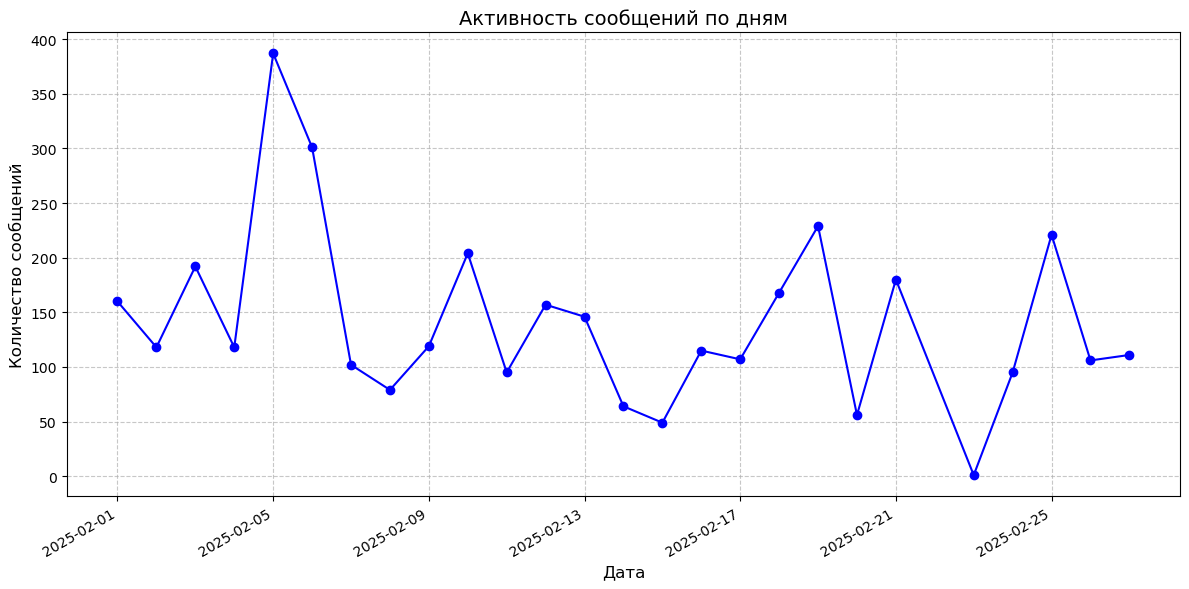

In [36]:
# Группируем по дате и считаем количество сообщений
daily_counts = df['date'].dt.floor('D').value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', color='blue', linestyle='-')

# Добавляем подписи
plt.title('Активность сообщений по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество сообщений', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Построения линейного графика активности сообщений за один день без агрегации**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


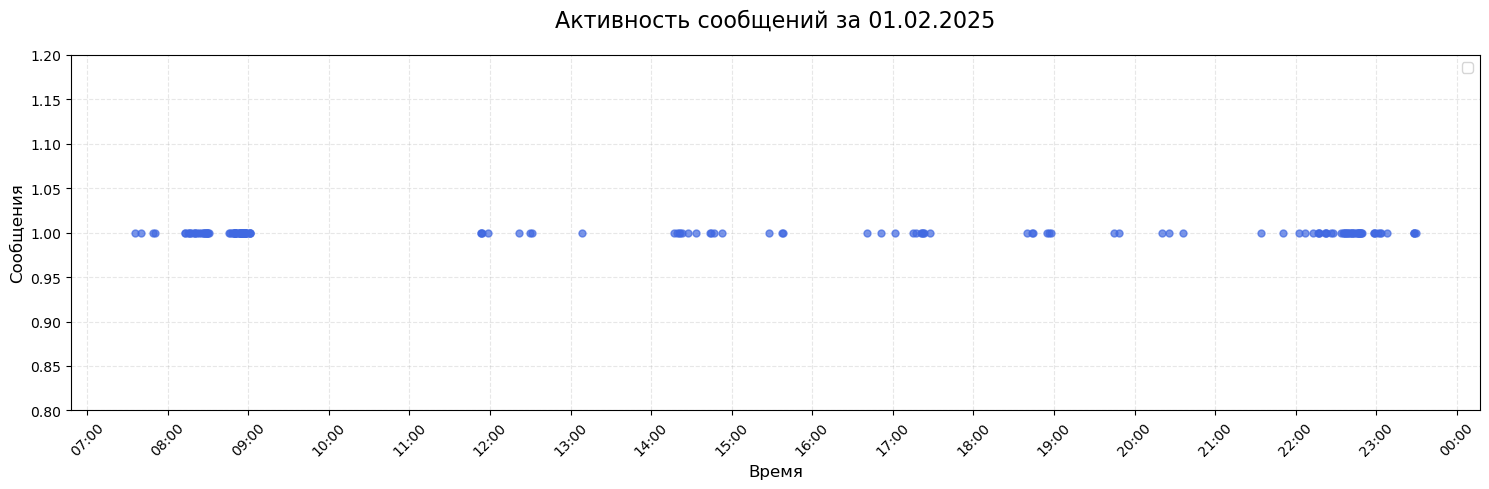

In [37]:
# Выбираем только первый день
first_day = df['date'].dt.date.min()
df_day = df[df['date'].dt.date == first_day].copy()

# Настройка стиля
plt.figure(figsize=(15, 5))

# Создаем график
ax = plt.gca()

# Вариант 1: Точечный график (каждое сообщение как точка)
ax.plot(df_day['date'],
        [1]*len(df_day),  # Все точки на y=1
        marker='o',
        markersize=5,
        linestyle='',
        alpha=0.7,
        color='royalblue')

# Настройка временной оси
ax.xaxis.set_major_locator(HourLocator(interval=1))  # Основные деления - каждый час
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))  # Формат времени

# Подписи и оформление
plt.title(f'Активность сообщений за {first_day.strftime("%d.%m.%Y")}', fontsize=16, pad=20)
plt.xlabel('Время', fontsize=12)
plt.ylabel('Сообщения', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.ylim(0.8, 1.2)  # Для точечного графика

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Выбираю пороговое значения - 30 минут

In [38]:
threshold_vspl = 30

In [39]:
# Добавляю пары соседних сообщений с порогом в 30 минут (в прошлом методе было 30 секунд)
# Порог выбрал вручную, глядя на графики активности сообщений
threshold_vspl = 30
y = []
for i in range(len(df)-1):
  if df.loc[i+1, 'date']-df.loc[i, 'date'] < pd.Timedelta(minutes=threshold_vspl):
    y.append([df.loc[i, 'message_id'], df.loc[i+1, 'message_id']])
len(y)

3466

In [40]:
para_vspl = pd.DataFrame(y, columns=['one','two'])
para_vspl

,one,two
0,42471,42472
1,42472,42473
2,42473,42474
3,42474,42475
4,42475,42476
...,...,...
3461,46399,46400
3462,46400,46401
3463,46401,46402
3464,46402,46403


In [41]:
# Составляем списки id сообщений в диалоги с помощью networkx
G = nx.Graph()
for _, row in para_vspl.iterrows():
    G.add_edge(row['one'], row['two'])
connected_components = list(nx.connected_components(G))
result_vspl = [sorted(list(component)) for component in connected_components]
result_vspl.sort(key=lambda x: x[0])
print(result_vspl[1:3])

[[42543, 42544, 42545, 42546, 42547, 42548, 42549], [42554, 42555, 42556, 42557, 42558, 42559, 42560, 42561, 42562, 42563, 42564]]


In [42]:
# Количество диалогов
len(result_vspl)

153

In [43]:
# Количество сообщений попавших в диалоги
total_vspl = sum(len(sublist) for sublist in result_vspl)
total_vspl

3619

In [44]:
# Количество сообщенией в наибольшем диалоге
total_vspl = max(len(sublist) for sublist in result_vspl)
total_vspl

206

In [45]:
# Сортирую
result_vspl_sorted = sorted(result_vspl, key=lambda x: len(x), reverse=True)
result_vspl_sorted_top = result_vspl_sorted[0:10]

In [46]:
# Отображаю 10 место
cluster_vspl_10 = df.loc[df['message_id'].isin(result_vspl_sorted_top[9]), 'text']#.tolist()
print('Количество сообщений в диалоге ', len(cluster_vspl_10))
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    print(cluster_vspl_10)


Количество сообщений в диалоге  79
2565                                                                                                                                                                                                                                                   Через гтм?
2566                                                                                                                                                                                                                                          Через oncontextmenu
2567                                                                                                                                                                                                                   Очень интересно, но не понятно 😂👍пример бы
2568                                                                                                                                                                                           

Вывод:
* Провел кластеризацию по всплескам активности. Порог по временногу интервалу между соседними сообщениями 30 минут.
* Порог по времени 30 минут. Этот порог выбрал после анализа графиков активности
* Собрал диалоги(кластеры) из 3466 связей(пар)
* 3619 сообщений (из 3680) попали в диалоги
* Получил 153 диалога.
* Выделил самые длинные (10шт).
* 206 собщения в самом большом, 79 в маленьком.
* Метрику оценил пока только визульно(почитал сообщения в диалоге). Связь между сообщениями прослеживается.

# Оценка и сравнение двух методов

Оценил по одному кластеру с помощью DeepSeek.

## Метод №1 кластер 10 - 51 сообщение

Запрос: Какую основную тему можно выделить в этом диалоге? + cluster_10

Результат: Основная тема диалога — проблема ботов и мусорного трафика в рекламных кампаниях, а также методы борьбы с ними.

Запрос: Сколько сообщений из этого диалога относятся к теме: проблема ботов и мусорного трафика в рекламных кампаниях, а также методы борьбы с ними. + cluster_10

Результат из 51 сообщения:
* 16 сообщений напрямую относятся к теме проблемы ботов, мусорного трафика и методов борьбы с ними.
* 22 сообщения релевантны
* остальные носят сопутствующий или оффтопный характер. (например, про креативы на грани фола, критику маркетологов-гуманитариев)

## Метод №2 кластер 10 - 79 сообщений

Запрос: Какую основную тему можно выделить в этом диалоге? + cluster_10

Результат: Технические аспекты настройки аналитики и рекламы

Запрос: Сколько сообщений из этого диалога относятся к теме: проблема ботов и мусорного трафика в рекламных кампаниях, а также методы борьбы с ними. + cluster_10

Результат из 79 сообщения:
* 24 сообщений напрямую относятся к теме проблемы ботов, мусорного трафика и методов борьбы с ними.
* 36 сообщений релевантны
* остальные оффтоп или другие темы.

# Вывод

Вывод: Оценил по одному кластеру с помощью DeepSeek. Также оценил кластеры вручную. Оба метода работают хорошо. Имеем четко сформулированную тему, практически все сообщения из кластера так или иначе в теме участвуют. Мне нравится результат Метода № 1. Кластеры поменьше и подход мне кажется получьше.  

Приемущество предствленного подхода для кластеризации:
* не используем машинное обучение
* точность (не доказано)
* простота реализации и интерпретируемость

Для нашей задачи считаю приемлем использование Метода №1.

# Доработка и оценка качества кластеризации Метода №1

## th_minute этот параметр зависит от плотности

В первом методе мы использовали порог в 30 секунд, найденый вручную на данном датасете. Этот параметр должен быть универсальным. При пороге в 30 секунд мы получbли вот такое количество связей (без реплай):

In [47]:
x = []
th_minute=0.5
for i in range(len(df)-1):
  if df.loc[i+1, 'date']-df.loc[i, 'date'] < pd.Timedelta(minutes=th_minute):
    x.append([df.loc[i, 'message_id'], df.loc[i+1, 'message_id']])
len(x)

1523

In [48]:
# Вычислим процент от всего количества сообщений
perc = round(len(x)/len(df), 2)*100
perc

41.0

In [49]:
# вычеслим полученый перцентиль на списке временных итервалов всех сообщений
pl = []
for i in range(len(df)-1):
   time_diff = df.loc[i+1, 'date']-df.loc[i, 'date']
   seconds = time_diff.total_seconds()
   pl.append(seconds)
percentile_int = int(np.percentile(pl, perc))
# выразим в минутах
th_minute = percentile_int/60
th_minute

0.48333333333333334

In [50]:
# Занаво соберем кластеры
x = []
for i in range(len(df)-1, -1, -1):
  if not pd.isna(df.loc[i, 'reply_to_message_id']):
    x.append([df.loc[i, 'message_id'], df.loc[i, 'reply_to_message_id']])
for i in range(len(df)-1):
  if df.loc[i+1, 'date']-df.loc[i, 'date'] < pd.Timedelta(minutes=th_minute):
    x.append([df.loc[i, 'message_id'], df.loc[i+1, 'message_id']])
para = pd.DataFrame(x, columns=['one','two'])
G = nx.Graph()
for _, row in para.iterrows():
    G.add_edge(row['one'], row['two'])
connected_components = list(nx.connected_components(G))
result = [sorted(list(component)) for component in connected_components]
result.sort(key=lambda x: x[0])
sorted_result = sorted(result, key=lambda x: len(x), reverse=True)

## Соберем датасет с важными признаками

### Столбец с номером кластера

In [51]:
df_clast = df[['message_id', 'text']]

In [52]:
len(sorted_result)

347

In [53]:
df_clast.loc[:, 'n_claster'] = np.nan
df_clast

C:\Users\Виталик\AppData\Local\Temp\ipykernel_15364\626968130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clast.loc[:, 'n_claster'] = np.nan


,message_id,text,n_claster
0,42471,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы...",NaN
1,42472,"А вот регионы, в которых живут ITшники с интер...",NaN
2,42473,"Если смотреть по интересам, то кажется, что ау...",NaN
3,42474,А путь пользователя почему-то выглядит так. Ко...,NaN
4,42475,Опять он,NaN
...,...,...,...
3675,46400,"Напишу им, спасибо.",NaN
3676,46401,"Старые профили не удаляются, номер на который ...",NaN
3677,46402,Пишите оператору (позовите пожалуйста оператор...,NaN
3678,46403,Отлично! Благодарю.,NaN


In [54]:
# Создаем словарь для быстрого поиска кластера по message_id
cluster_mapping = {}
for cluster_idx, cluster in enumerate(sorted_result):
    for message_id in cluster:
        cluster_mapping[float(message_id)] = cluster_idx  # преобразуем np.float64 в float

# Заполняем столбец n_claster
df_clast.loc[:, 'n_claster'] = df_clast['message_id'].map(cluster_mapping)

# Если какие-то message_id не найдены в кластерах, они останутся NaN
df_clast

,message_id,text,n_claster
0,42471,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы...",42.0
1,42472,"А вот регионы, в которых живут ITшники с интер...",NaN
2,42473,"Если смотреть по интересам, то кажется, что ау...",141.0
3,42474,А путь пользователя почему-то выглядит так. Ко...,42.0
4,42475,Опять он,197.0
...,...,...,...
3675,46400,"Напишу им, спасибо.",117.0
3676,46401,"Старые профили не удаляются, номер на который ...",117.0
3677,46402,Пишите оператору (позовите пожалуйста оператор...,248.0
3678,46403,Отлично! Благодарю.,248.0


In [55]:
# проверка
len(df_clast.query('n_claster == 9'))


51

In [56]:
cluster_10 = df.loc[df['message_id'].isin(sorted_result[9]), 'text']#.tolist()
print('Количество сообщений в диалоге ', len(cluster_10))

Количество сообщений в диалоге  51


### Столбец с количеством сообщений в кластере

In [57]:
# Создаем и добавляем столбец с размерами кластеров
cluster_sizes = {i: len(cluster) for i, cluster in enumerate(sorted_result)}
df_clast.loc[:, 'cluster_size'] = df_clast['n_claster'].map(cluster_sizes)
df_clast

C:\Users\Виталик\AppData\Local\Temp\ipykernel_15364\2511674130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clast.loc[:, 'cluster_size'] = df_clast['n_claster'].map(cluster_sizes)


,message_id,text,n_claster,cluster_size
0,42471,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы...",42.0,23.0
1,42472,"А вот регионы, в которых живут ITшники с интер...",NaN,NaN
2,42473,"Если смотреть по интересам, то кажется, что ау...",141.0,5.0
3,42474,А путь пользователя почему-то выглядит так. Ко...,42.0,23.0
4,42475,Опять он,197.0,3.0
...,...,...,...,...
3675,46400,"Напишу им, спасибо.",117.0,8.0
3676,46401,"Старые профили не удаляются, номер на который ...",117.0,8.0
3677,46402,Пишите оператору (позовите пожалуйста оператор...,248.0,3.0
3678,46403,Отлично! Благодарю.,248.0,3.0


### Столбец с количеством связей у сообщения

In [58]:
para

,one,two
0,46405,46403.0
1,46403,46402.0
2,46401,46394.0
3,46398,46396.0
4,46396,46394.0
...,...,...
3765,46395,46396.0
3766,46396,46397.0
3767,46397,46398.0
3768,46398,46399.0


In [59]:
# Считаем вхождения каждого ID в обоих столбцах
counts_one = para['one'].value_counts()
counts_two = para['two'].value_counts()

# Объединяем счетчики (складываем значения для одинаковых ID)
total_counts = counts_one.add(counts_two, fill_value=0).astype(int)

# Добавляем новый столбец в исходный датафрейм
para['connection_count'] = para['one'].map(total_counts)

In [60]:
para

,one,two,connection_count
0,46405,46403.0,1
1,46403,46402.0,2
2,46401,46394.0,1
3,46398,46396.0,3
4,46396,46394.0,4
...,...,...,...
3765,46395,46396.0,2
3766,46396,46397.0,4
3767,46397,46398.0,2
3768,46398,46399.0,3


In [61]:
# Добавляем счетчик связей в df_clast
df_clast.loc[:,'connection_count'] = df_clast['message_id'].map(total_counts)
df_clast

C:\Users\Виталик\AppData\Local\Temp\ipykernel_15364\2418018131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clast.loc[:,'connection_count'] = df_clast['message_id'].map(total_counts)


,message_id,text,n_claster,cluster_size,connection_count
0,42471,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы...",42.0,23.0,2.0
1,42472,"А вот регионы, в которых живут ITшники с интер...",NaN,NaN,NaN
2,42473,"Если смотреть по интересам, то кажется, что ау...",141.0,5.0,1.0
3,42474,А путь пользователя почему-то выглядит так. Ко...,42.0,23.0,1.0
4,42475,Опять он,197.0,3.0,2.0
...,...,...,...,...,...
3675,46400,"Напишу им, спасибо.",117.0,8.0,1.0
3676,46401,"Старые профили не удаляются, номер на который ...",117.0,8.0,1.0
3677,46402,Пишите оператору (позовите пожалуйста оператор...,248.0,3.0,1.0
3678,46403,Отлично! Благодарю.,248.0,3.0,2.0


<Axes: >

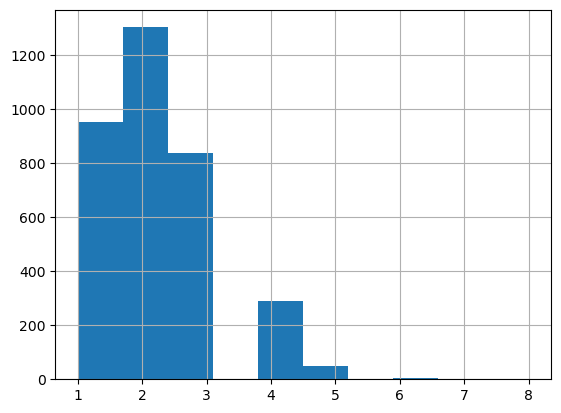

In [64]:
df_clast['connection_count'].hist()

In [66]:
df_clast.query('n_claster == 0 & connection_count > 2')['text']

606    Коллеги, добры день, за советом. \nВзяли РК, к...
612    Предлагаю попробовать разместить только на сай...
627    если не оставят данных при покупке, то конечно...
628    Ребята, привет! \nСмотрите! \nВ Яндекс Поиске ...
630          Что то не обращал внимания, надо посмотреть
631    Большие челы для этого ставят в магазы вайфай ...
632    Раньше был отчет о посещаемости теми, кто виде...
634    сейчас уже пирожок в ларьке купишь, и то телеф...
635                    Мне уже несколько раз попадалась.
636               Раньше был кстати, да\n\nЩас вроде нет
637                Чтобы понять откуда приходил и т.п. ?
641    Помню, помню как вчера это было... 2014 год, о...
645                                      На виндовс фон?
646                                               Дааааа
652    Всем привет! \nПоявился такой вопрос. Или даже...
654    Если бы меня попросили оставить телефон за пир...
656    Посмотри на хх вакансии, с большинством после ...
657    Иногда хочется сделать о

In [ ]:
# Преобразуем сообщения в более читаемый формат
messages = "\n".join(df_clast.query('n_claster == 0 & connection_count > 2')['text'].tolist())

prompt = f"""
Проанализируй следующие сообщения из одного кластера и определи основную тему диалога.
Сообщения должны иметь общую тематику, так как они попали в один кластер. Напиши только основную тему. Без пояснений.

Сообщения:
{messages}

Основная тема диалога: 
"""

response = ollama.generate(model="llama3:8b", prompt=prompt)
print(response['response'])

Реклама и продвижение бизнеса


In [84]:
df_clast_filtred = df_clast.query('connection_count > 2')
df_clast_filtred

,message_id,text,n_claster,cluster_size,connection_count
6,42477,Потому и выбрал,141.0,5.0,3.0
11,42482,"Что такое Яндекс Игры? Я вот сижу, работаю, пр...",42.0,23.0,3.0
15,42487,"Ок. А как тогда получается, что пользователь о...",42.0,23.0,3.0
16,42488,В смысле?,42.0,23.0,3.0
19,42491,Если Яндекс Игры открыли для ребенка на телефо...,42.0,23.0,3.0
...,...,...,...,...,...
3661,46385,Можно. Буду благодарен. Освою что-То новое.,74.0,14.0,5.0
3662,46386,Только тг аккаунты и прокси сам покупай они та...,74.0,14.0,3.0
3669,46394,"Коллеги, вопрос такой. У компании есть забытый...",117.0,8.0,3.0
3671,46396,Через поддержку вроде все,117.0,8.0,4.0


In [85]:
clusters = df_clast_filtred.groupby('n_claster')['text'].apply(list).reset_index()

In [86]:
clusters

,n_claster,text
0,0.0,"[Коллеги, добры день, за советом. \nВзяли РК, ..."
1,1.0,"[Ребят, привет!\n\nМожет кто знает, участвовал..."
2,2.0,[А пока я одну расскажу\n\nРоскомнадзор будет ...
3,3.0,"[, Чувствую этот запах), Как будто там огонь п..."
4,4.0,"[Правило действительно хорошее, думаю последую..."
...,...,...
162,207.0,"[Тут надо аккуратней силы рассчитывать, а то к..."
163,208.0,"[То есть половина данных потеряется, а может и..."
164,213.0,[Хочешь отучиться?]
165,222.0,[Площадку добавляли (вк) или она сама туда поп...


In [87]:
# 2. Определим функцию для получения темы от LLM
def get_cluster_topic(messages):
    
    prompt = f"""
    Проанализируй следующие сообщения из одного кластера и определи основную тему диалога.
    Сообщения должны иметь общую тематику, так как они попали в один кластер. Напиши только основную тему. Без пояснений.

    Сообщения:
    {messages}

    Основная тема диалога: 
    """
    
    try:
        response = ollama.generate(
            model="llama3:8b",
            prompt=prompt,
            options={'temperature': 0.3} # Для более консервативных ответов
        )
        return response['response'].strip()
    except Exception as e:
        print(f"Ошибка для кластера: {e}")
        return "Не определена"

In [88]:
# 3. Получим темы для каждого кластера
clusters['topic'] = clusters['text'].apply(get_cluster_topic)

In [90]:
# 4. Объединим результаты с исходным датафреймом
df_clast = df_clast.merge(
    clusters[['n_claster', 'topic']],
    on='n_claster',
    how='left'
)

In [91]:

# 5. Для сообщений без кластера заполним тему
df_clast['topic'] = df_clast['topic'].fillna('Неизвестная тема')

In [92]:
df_clast

,message_id,text,n_claster,cluster_size,connection_count,topic
0,42471,"[Доброе утро, люди! Это ОК, в РСЯ алгоритмы вы...",42.0,23.0,2.0,Яндекс Игры
1,42472,"А вот регионы, в которых живут ITшники с интер...",NaN,NaN,NaN,Неизвестная тема
2,42473,"Если смотреть по интересам, то кажется, что ау...",141.0,5.0,1.0,Выбор
3,42474,А путь пользователя почему-то выглядит так. Ко...,42.0,23.0,1.0,Яндекс Игры
4,42475,Опять он,197.0,3.0,2.0,Неизвестная тема
...,...,...,...,...,...,...
3675,46400,"Напишу им, спасибо.",117.0,8.0,1.0,Удаление забытого профиля в Яндексе и создание...
3676,46401,"Старые профили не удаляются, номер на который ...",117.0,8.0,1.0,Удаление забытого профиля в Яндексе и создание...
3677,46402,Пишите оператору (позовите пожалуйста оператор...,248.0,3.0,1.0,Неизвестная тема
3678,46403,Отлично! Благодарю.,248.0,3.0,2.0,Неизвестная тема


In [96]:
clusters[['n_claster', 'topic']]

,n_claster,topic
0,0.0,Реклама и маркетинг
1,1.0,"РPG игры (Kingdom Come: Deliverance 2, Skyrim)"
2,2.0,Битрикс
3,3.0,Компьютеры и интернет.
4,4.0,Бизнес/экономика
...,...,...
162,207.0,Финансы/Бюджет
163,208.0,Качество данных
164,213.0,Образование
165,222.0,Местоположение/география


In [93]:
# Экспорт DataFrame в Excel файл
df_clast.to_excel('df_clast.xlsx', index=False, engine='openpyxl')

print("Файл успешно сохранён: df_clast.xlsx")

Файл успешно сохранён: df_clast.xlsx


In [97]:
# Экспорт DataFrame в Excel файл
clusters[['n_claster', 'topic']].to_excel('clusters.xlsx', index=False, engine='openpyxl')

print("Файл успешно сохранён: clusters.xlsx")

Файл успешно сохранён: clusters.xlsx


# Вывод

1. На основе метода №1 провел кластеризацию
2. Собрал Датафрейм
    * message_id
    * text
    * n_claster - номер кластера от  0 по количеству сообщений в кластере (нулевой самый большой)
    * cluster_size - количество сообщений в кластере
    * connection_count - количество связей сообщение с другими сообщениями
    * topic - название темы диалога. 
Название темы диалога заполнил на основе работы llama3:8b (код выполнялся примерно 10 минут)
Запрос:  'Проанализируй следующие сообщения из одного кластера и определи основную тему диалога.
    Сообщения должны иметь общую тематику, так как они попали в один кластер. Напиши только основную тему. Без пояснений.  

    Сообщения:
    {messages}

    Основная тема диалога:'  
В качестве сообщений подовались соошения: серия сообщений message преобразованная в строку "как есть".  
Предворительно сообщения были отфильтрованы по признаку количество связей больше двух.  
Температура модели: Пониженная температура (0.3) для более предсказуемых ответов  

В результате создал два файла в Excel. Основной датафрейм и список названий кластеров.